In [2]:
import numpy as np
import datetime as dt
import scipy.signal as scs
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel
import sys
sys.path.append('D:\\gitCCA\\CESdesign\\py')
import CESfunctions_dev as cf

In [38]:
##### File loading
sample = np.load('D:\\CCA\\Avantes\\BBCEAS_Data\\20220316\\Isamples2203171312.npy')
background = np.loadtxt('D:\\CCA\\Avantes\\BBCEAS_Data\\20220316\\Ib2203161507.txt')
dateM,ppb1M,ppb2M,intM = cf.Mfile_read('D:\\CCA\\Avantes\\BBCEAS_Data\\20220316\\M2203171312_r.txt')
reference1=np.load("NO2_AvSC.npy")
reference2=np.load("CHOCHO_AvSC.npy")

##### Calibration of the wavelengths
calfactors=(2.47080093383789e2,1.69589176774025e-1,-3.51128119291388e-6,-1.37265324107183e-10)
wavelengths=cf.avantes_calibrator(len(sample[:,0]),*calfactors)
sample[:,0]=wavelengths[:,0]

##### Cavity and spectra parameters
lower_wavelength,upper_wavelength,distance,Reff=(445,459,70,.9994277)
dfactor = 1 - 150/5200

In [39]:
##### Cutting sprectra, defining I_sample and I_0
minwave,maxwave=cf.segment_indices(sample,lower_wavelength,upper_wavelength)
line=np.copy(sample[minwave:maxwave,:])
bckg=np.copy(background[minwave:maxwave,:])
ref1=np.copy(reference1[minwave:maxwave,:])
ref2=np.copy(reference2[minwave:maxwave,:])
I_0 = np.average(bckg[:,1:],axis=1).reshape(len(bckg),1)

In [40]:
fl_avg=[]
fl_int=[]
fl_448=[]
fl_450=[]
fl_452=[]
fl_454=[]
fl_456=[]
for i in range(len(line.T)-1):
    alpha,fl,a,b,c,d = cf.fit_alg_1(line[:,i+1], np.average(bckg[:,1:],axis=1), .9994277, 70,ref1,ref2,verbose=0,
                                    parameters=1)
    minwave,maxwave=cf.segment_indices(ref1,448,449)
    fl_448.append(fl[minwave])
    minwave,maxwave=cf.segment_indices(ref1,450,451)
    fl_450.append(fl[minwave])
    minwave,maxwave=cf.segment_indices(ref1,452,453)
    fl_452.append(fl[minwave])
    minwave,maxwave=cf.segment_indices(ref1,454,455)
    fl_454.append(fl[minwave])
    minwave,maxwave=cf.segment_indices(ref1,456,457)
    fl_456.append(fl[minwave])
    fl_avg.append(np.average(b*fl))
    fl_int.append(np.trapz(b*fl))
    

In [16]:
dateR1,ppbR1 = cf.RAMA_read('D:\\CCA\\Avantes\\BBCEAS_Data\\RAMA\\CCA_20220315_M.csv')
df = pd.read_csv('D:\\CCA\\Avantes\\BBCEAS_Data\\RAMA\\CCA_20220315_M.csv')
df2 = df[df.Parametro == "PM25"]
pm25R1 = []
for ele in df2.RawValue:
    pm25R1.append(ele)

dateR2,ppbR2 = cf.RAMA_read('D:\\CCA\\Avantes\\BBCEAS_Data\\RAMA\\CCA_20220316_M.csv')
df = pd.read_csv('D:\\CCA\\Avantes\\BBCEAS_Data\\RAMA\\CCA_20220316_M.csv')
df2 = df[df.Parametro == "PM25"]
pm25R2 = []
for ele in df2.RawValue:
    pm25R2.append(ele)

In [37]:
fl_avg_s=fl_avg
fl_int_s=fl_int
fl_448_s=fl_448
fl_450_s=fl_450
fl_452_s=fl_452
fl_454_s=fl_454
fl_456_s=fl_456
dateM_s=dateM

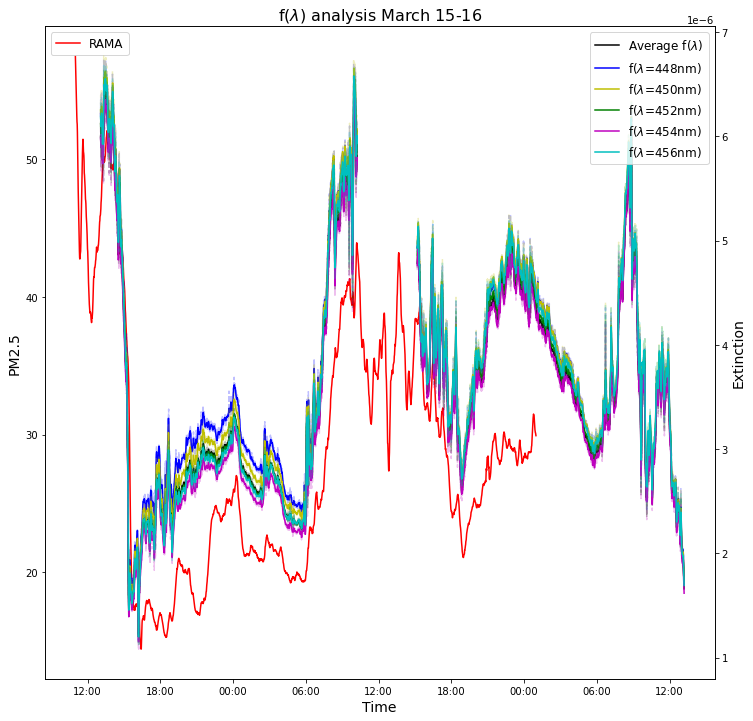

In [44]:
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(111)


ax1.plot(dateR1[600:],pm25R1[600:],'-r',label="RAMA")
ax1.plot(dateR2[:],pm25R2[:],'-r')
ax1.set_ylabel('PM2.5',size=14)
ax1.set_xlabel('Time',size=14)
ax1.set_title("f($\\lambda$) analysis March 15-16",size=16)
ax1.legend(fontsize=12, loc='upper left')

ax2=ax1.twinx()
ax2.plot(dateM_s,fl_avg_s,'--k',alpha=0.25)
ax2.plot(dateM_s,scs.savgol_filter(fl_avg_s,21,3),'-k')
ax2.plot(dateM_s,fl_448_s,'--b',alpha=0.25)
ax2.plot(dateM_s,scs.savgol_filter(fl_448_s,21,3),'-b')
ax2.plot(dateM_s,fl_450_s,'--y',alpha=0.25)
ax2.plot(dateM_s,scs.savgol_filter(fl_450_s,21,3),'-y')
ax2.plot(dateM_s,fl_452_s,'--g',alpha=0.25)
ax2.plot(dateM_s,scs.savgol_filter(fl_452_s,21,3),'-g')
ax2.plot(dateM_s,fl_454_s,'--m',alpha=0.25)
ax2.plot(dateM_s,scs.savgol_filter(fl_454_s,21,3),'-m')
ax2.plot(dateM_s,fl_456_s,'--c',alpha=0.25)
ax2.plot(dateM_s,scs.savgol_filter(fl_456_s,21,3),'-c')
ax2.plot(dateM,fl_avg,'--k',alpha=0.25)
ax2.plot(dateM,scs.savgol_filter(fl_avg,21,3),'-k',label="Average f($\\lambda$)")
ax2.plot(dateM,fl_448,'--b',alpha=0.25)
ax2.plot(dateM,scs.savgol_filter(fl_448,21,3),'-b',label="f($\\lambda$=448nm)")
ax2.plot(dateM,fl_450,'--y',alpha=0.25)
ax2.plot(dateM,scs.savgol_filter(fl_450,21,3),'-y',label="f($\\lambda$=450nm)")
ax2.plot(dateM,fl_452,'--g',alpha=0.25)
ax2.plot(dateM,scs.savgol_filter(fl_452,21,3),'-g',label="f($\\lambda$=452nm)")
ax2.plot(dateM,fl_454,'--m',alpha=0.25)
ax2.plot(dateM,scs.savgol_filter(fl_454,21,3),'-m',label="f($\\lambda$=454nm)")
ax2.plot(dateM,fl_456,'--c',alpha=0.25)
ax2.plot(dateM,scs.savgol_filter(fl_456,21,3),'-c',label="f($\\lambda$=456nm)")
#ax2.plot(dateM,fl_int,'-b',label="Integrated f($\\lambda$)")
ax2.set_ylabel('Extinction',size=14)
ax2.legend(fontsize=12, loc='upper right')

ax1.xaxis.set_major_formatter(DateFormatter("%H:%M")) 

In [13]:
np.savetxt("calwaves.txt",wavelengths)